In [1]:
#!/usr/bin/env python
# coding: utf-8

In [7]:
#Instalando librerias 
get_ipython().system('pip  install opencv-python')
get_ipython().system('pip install matplotlib')
get_ipython().system('pip install tensorflow==2.2.1')
get_ipython().system('pip install pillow')

In [4]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.2.1


In [8]:
direc_entrenamiento='/home/kevjlope/Desktop/KevinLopez/Detector-de-Mascarilla-y-Temperatura--Covid2020/observations-master/experiements/data/'
direc_entre_mask=os.path.join(direc_entrenamiento,"with_mask")
direc_entre_No_mask=os.path.join(direc_entrenamiento,"without_mask")

In [9]:
print('total imagenes con mascarillas', len(os.listdir(direc_entre_mask)))
print('total imagenes sin mascarillas', len(os.listdir(direc_entre_No_mask)))

total imagenes con mascarillas 690
total imagenes sin mascarillas 686


In [10]:
#Modelo 
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    #Clasificacion binaria
    tf.keras.layers.Dense(1,activation= 'sigmoid')
    
])


In [11]:
#
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height =150
img_width=150
batch_size=10
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.2) #set validation split

train_generator =train_datagen.flow_from_directory(
direc_entrenamiento,
target_size=(img_height,img_width),
batch_size=batch_size,
class_mode='binary',
subset='training') #set as trainign data

validation_generator = train_datagen.flow_from_directory(
    direc_entrenamiento, #same directory as a training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation' #data set para al validacion
)



Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [13]:
nb_epochs =10
history =model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = nb_epochs)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
110/110 [==============================] - 36s 330ms/step - loss: 0.2442 - accuracy: 0.8928 - val_loss: 0.1247 - val_accuracy: 0.9630
Epoch 2/10
110/110 [==============================] - 29s 263ms/step - loss: 0.0973 - accuracy: 0.9707 - val_loss: 0.0937 - val_accuracy: 0.9630
Epoch 3/10
110/110 [==============================] - 31s 284ms/step - loss: 0.1365 - accuracy: 0.9633 - val_loss: 0.0680 - val_accuracy: 0.9778
Epoch 4/10
110/110 [==============================] - 38s 346ms/step - loss: 0.0414 - accuracy: 0.9835 - val_loss: 0.0672 - val_accuracy: 0.9704
Epoch 5/10
110/110 [==============================] - 38s 350ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.0757 - val_accuracy: 0.9815
Epoch 6/10
110/110 [==============================] - 26s 236ms/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.0908 - val_accuracy: 0.9852
Epoch 7/10
110/110 [==============================] - 

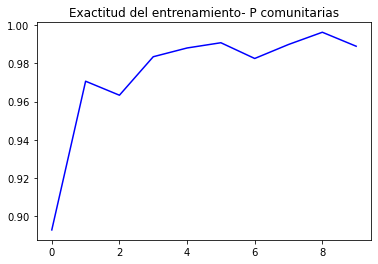

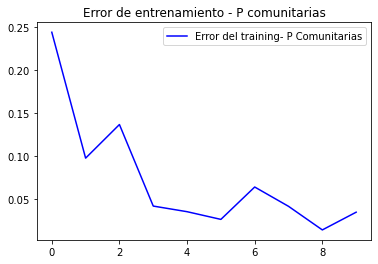

In [14]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss =history.history['loss']

#Graficar la excatitud  vs las perdidas
epochs =range(len(acc))

#envio de datos a graficar 
plt.plot(epochs, acc, 'b', label='Exactitud del entrenamiento comunitarias mascarilla ')
plt.title('Exactitud del entrenamiento- P comunitarias')

plt.figure()

plt.plot(epochs, loss, 'b', label ='Error del training- P Comunitarias')
plt.title('Error de entrenamiento - P comunitarias')
plt.legend()

plt.show()

In [19]:
from tensorflow.keras.preprocessing import image
from PIL import Image

In [21]:
vc = cv2.VideoCapture(0) 
plt.ion()
if vc.isOpened(): 
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
        frame_res = cv2.resize(frame, dsize=(150, 150), interpolation=cv2.INTER_CUBIC) #Lee el mismo size que espera el modelo y te ahorra reshapes
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No lleva Mascarilla - P. Comunitarias")
        else:
            print("Si lleva Macarilla - P.Comunitarias")
        webcam_preview = plt.imshow(frame)
        try:    
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()